# Question 1

Denoising autoencoders: We will evaluate stacked denoising autoencoders applied to the MNIST dataset.

Obtain (or write! but this isn't required) a tensorflow code for a stacked denoising autoencoder. Train this autoencoder on the MNIST dataset. Use only the MNIST training set. You should stack at least three layers.

We now need to determine how well this autoencoder works. For each image in the MNIST test dataset, compute the residual error of the autoencoder. This is the difference between the true image and the reconstruction of that image by the autoencoder. It is an image itself. Prepare a figure showing the mean residual error, and the first five principal components. Each is an image. You should preserve signs (i.e. the mean residual error may have negative as well as positive entries). The way to show these images most informatively is to use a mid gray value for zero, then darker values for more negative image values and lighter values for more positive values. The scale you choose matters.

In [1]:
from deepautoencoder import StackedAutoEncoder
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 

#read data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
data, target = mnist.train.images, mnist.train.labels
test_x, test_s = mnist.test.images, mnist.test.labels
# train / test  split
#idx = np.random.rand(data.shape[0]) < 0.8
train_X, train_Y = data, target
#test_X, test_Y = data[~idx], target[~idx]

#Question 1 part 1
model = StackedAutoEncoder(dims=[784, 784 , 784], activations=['relu', 'linear','softmax'], epoch=[
                           500, 500, 500], loss='rmse', lr=0.007, batch_size=100, print_step=200)
model.fit(train_X)
test_X_trans = model.transform(test_x)
residual_error = abs(test_X_trans - test_x)

#Question 1 part 2
#PCA 5 components
pca=PCA(n_components=5)
pca_error = pca.fit_transform(residual_error.T)

#mean error
mean_error = np.mean(residual_error, axis=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Layer 1

Layer 2

Layer 3



In [2]:
def grayify_cmap(cmap):
    """Return a grayscale version of the colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived greyscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return cmap.from_list(cmap.name + "_grayscale", colors, cmap.N)

## Mean and five principal components on the same gray scale for all six images, chosen so the largest absolute value over all six images is full dark or full light respectively.

In [3]:
#mean
plt.imshow(mean_error.reshape((28, 28)), cmap=plt.cm.gray)
plt.savefig("1.png")

In [4]:
#The first principal components
plt.imshow(pca_error[:,0].reshape((28, 28)), cmap=plt.cm.gray)
plt.savefig("2.png")

In [5]:
#The second principal components
plt.imshow(pca_error[:,1].reshape((28, 28)), cmap=plt.cm.gray)
plt.savefig("3.png")

In [6]:
#The third principal components
plt.imshow(pca_error[:,2].reshape((28, 28)), cmap=plt.cm.gray)
plt.savefig("4.png")

In [7]:
#The fourth principal components
plt.imshow(pca_error[:,3].reshape((28, 28)), cmap=plt.cm.gray)
plt.savefig("5.png")

In [8]:
#The fifth principal components
plt.imshow(pca_error[:,4].reshape((28, 28)), cmap=plt.cm.gray)
plt.savefig("6.png")

## mean and five principal components on a scale where the gray scale is chosen for each image separately.

In [9]:
#mean
plt.imshow(mean_error.reshape((28, 28)), cmap=grayify_cmap('jet'))
plt.savefig("7.png")

In [10]:
#The first principal components
plt.imshow(pca_error[:,0].reshape((28, 28)), cmap=grayify_cmap('jet'))
plt.savefig("8.png")

In [11]:
#The second principal components
plt.imshow(pca_error[:,1].reshape((28, 28)), cmap=grayify_cmap('jet'))
plt.savefig("9.png")

In [12]:
#The third  principal components
plt.imshow(pca_error[:,2].reshape((28, 28)), cmap=grayify_cmap('jet'))
plt.savefig("10.png")

In [13]:
#The fourth principal components
plt.imshow(pca_error[:,3].reshape((28, 28)), cmap=grayify_cmap('jet'))
plt.savefig("11.png")

In [14]:
#The fifth principal components
plt.imshow(pca_error[:,4].reshape((28, 28)), cmap=grayify_cmap('jet'))
plt.savefig("12.png")

# Question 2

Variational autoencoders: We will evaluate variational autoencoders applied to the MNIST dataset.
Obtain (or write! but this isn't required) a tensorflow code for a variational autoencoder. Train this autoencoder on the MNIST dataset. Use only the MNIST training set.
We now need to determine how well the codes produced by this autoencoder can be interpolated.
For 10 pairs of MNIST test images of the same digit, selected at random, compute the code for each image of the pair. Now compute 7 evenly spaced linear interpolates between these codes, and decode the result into images. Prepare a figure showing this interpolate. Lay out the figure so each interpolate is a row. On the left of the row is the first test image; then the interpolate closest to it; etc; to the last test image. You should have a 10 rows and 9 columns of images.
For 10 pairs of MNIST test images of different digits, selected at random, compute the code for each image of the pair. Now compute 7 evenly spaced linear interpolates between these codes, and decode the result into images. Prepare a figure showing this interpolate. Lay out the figure so each interpolate is a row. On the left of the row is the first test image; then the interpolate closest to it; etc; to the last test image. You should have a 10 rows and 9 columns of images.

In [28]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
tf.set_random_seed(0)

# Load MNIST data in a format suited for tensorflow.
# The script input_data is available under this URL:
# https://raw.githubusercontent.com/tensorflow/tensorflow/master/tensorflow/examples/tutorials/mnist/input_data.py
import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
n_samples = mnist.train.num_examples

Extracting MNIST_data\train-images-idx3-ubyte.gz


d:\bioinformatics\python3.5\lib\gzip.py:274: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  return self._buffer.read(size)
C:\Users\98302\Desktop\作业及课件\CS498 Applied Machine Learning\homework\homework9\input_data.py:40: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  data = data.reshape(num_images, rows, cols, 1)


Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [29]:
def xavier_init(fan_in, fan_out, constant=1): 
    """ Xavier initialization of network weights"""
    # https://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
    low = -constant*np.sqrt(6.0/(fan_in + fan_out)) 
    high = constant*np.sqrt(6.0/(fan_in + fan_out))
    return tf.random_uniform((fan_in, fan_out), 
                             minval=low, maxval=high, 
                             dtype=tf.float32)

class VariationalAutoencoder(object):
    """ Variation Autoencoder (VAE) with an sklearn-like interface implemented using TensorFlow.
    
    This implementation uses probabilistic encoders and decoders using Gaussian 
    distributions and  realized by multi-layer perceptrons. The VAE can be learned
    end-to-end.
    
    See "Auto-Encoding Variational Bayes" by Kingma and Welling for more details.
    """
    def __init__(self, network_architecture, transfer_fct=tf.nn.softplus, 
                 learning_rate=0.001, batch_size=100):
        self.network_architecture = network_architecture
        self.transfer_fct = transfer_fct
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        
        # tf Graph input
        self.x = tf.placeholder(tf.float32, [None, network_architecture["n_input"]])
        
        # Create autoencoder network
        self._create_network()
        # Define loss function based variational upper-bound and 
        # corresponding optimizer
        self._create_loss_optimizer()
        
        # Initializing the tensor flow variables
        init = tf.global_variables_initializer()

        # Launch the session
        self.sess = tf.InteractiveSession()
        self.sess.run(init)
    
    def _create_network(self):
        # Initialize autoencode network weights and biases
        network_weights = self._initialize_weights(**self.network_architecture)

        # Use recognition network to determine mean and 
        # (log) variance of Gaussian distribution in latent
        # space
        self.z_mean, self.z_log_sigma_sq = \
            self._recognition_network(network_weights["weights_recog"], 
                                      network_weights["biases_recog"])

        # Draw one sample z from Gaussian distribution
        n_z = self.network_architecture["n_z"]
        eps = tf.random_normal((self.batch_size, n_z), 0, 1, 
                               dtype=tf.float32)
        # z = mu + sigma*epsilon
        self.z = tf.add(self.z_mean, 
                        tf.multiply(tf.sqrt(tf.exp(self.z_log_sigma_sq)), eps))

        # Use generator to determine mean of
        # Bernoulli distribution of reconstructed input
        self.x_reconstr_mean = \
            self._generator_network(network_weights["weights_gener"],
                                    network_weights["biases_gener"])
            
    def _initialize_weights(self, n_hidden_recog_1, n_hidden_recog_2, 
                            n_hidden_gener_1,  n_hidden_gener_2, 
                            n_input, n_z):
        all_weights = dict()
        all_weights['weights_recog'] = {
            'h1': tf.Variable(xavier_init(n_input, n_hidden_recog_1)),
            'h2': tf.Variable(xavier_init(n_hidden_recog_1, n_hidden_recog_2)),
            'out_mean': tf.Variable(xavier_init(n_hidden_recog_2, n_z)),
            'out_log_sigma': tf.Variable(xavier_init(n_hidden_recog_2, n_z))}
        all_weights['biases_recog'] = {
            'b1': tf.Variable(tf.zeros([n_hidden_recog_1], dtype=tf.float32)),
            'b2': tf.Variable(tf.zeros([n_hidden_recog_2], dtype=tf.float32)),
            'out_mean': tf.Variable(tf.zeros([n_z], dtype=tf.float32)),
            'out_log_sigma': tf.Variable(tf.zeros([n_z], dtype=tf.float32))}
        all_weights['weights_gener'] = {
            'h1': tf.Variable(xavier_init(n_z, n_hidden_gener_1)),
            'h2': tf.Variable(xavier_init(n_hidden_gener_1, n_hidden_gener_2)),
            'out_mean': tf.Variable(xavier_init(n_hidden_gener_2, n_input)),
            'out_log_sigma': tf.Variable(xavier_init(n_hidden_gener_2, n_input))}
        all_weights['biases_gener'] = {
            'b1': tf.Variable(tf.zeros([n_hidden_gener_1], dtype=tf.float32)),
            'b2': tf.Variable(tf.zeros([n_hidden_gener_2], dtype=tf.float32)),
            'out_mean': tf.Variable(tf.zeros([n_input], dtype=tf.float32)),
            'out_log_sigma': tf.Variable(tf.zeros([n_input], dtype=tf.float32))}
        return all_weights
            
    def _recognition_network(self, weights, biases):
        # Generate probabilistic encoder (recognition network), which
        # maps inputs onto a normal distribution in latent space.
        # The transformation is parametrized and can be learned.
        layer_1 = self.transfer_fct(tf.add(tf.matmul(self.x, weights['h1']), 
                                           biases['b1'])) 
        layer_2 = self.transfer_fct(tf.add(tf.matmul(layer_1, weights['h2']), 
                                           biases['b2'])) 
        z_mean = tf.add(tf.matmul(layer_2, weights['out_mean']),
                        biases['out_mean'])
        z_log_sigma_sq = \
            tf.add(tf.matmul(layer_2, weights['out_log_sigma']), 
                   biases['out_log_sigma'])
        return (z_mean, z_log_sigma_sq)

    def _generator_network(self, weights, biases):
        # Generate probabilistic decoder (decoder network), which
        # maps points in latent space onto a Bernoulli distribution in data space.
        # The transformation is parametrized and can be learned.
        layer_1 = self.transfer_fct(tf.add(tf.matmul(self.z, weights['h1']), 
                                           biases['b1'])) 
        layer_2 = self.transfer_fct(tf.add(tf.matmul(layer_1, weights['h2']), 
                                           biases['b2'])) 
        x_reconstr_mean = \
            tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['out_mean']), 
                                 biases['out_mean']))
        return x_reconstr_mean
            
    def _create_loss_optimizer(self):
        # The loss is composed of two terms:
        # 1.) The reconstruction loss (the negative log probability
        #     of the input under the reconstructed Bernoulli distribution 
        #     induced by the decoder in the data space).
        #     This can be interpreted as the number of "nats" required
        #     for reconstructing the input when the activation in latent
        #     is given.
        # Adding 1e-10 to avoid evaluation of log(0.0)
        reconstr_loss = \
            -tf.reduce_sum(self.x * tf.log(1e-10 + self.x_reconstr_mean)
                           + (1-self.x) * tf.log(1e-10 + 1 - self.x_reconstr_mean),
                           1)
        # 2.) The latent loss, which is defined as the Kullback Leibler divergence 
        ##    between the distribution in latent space induced by the encoder on 
        #     the data and some prior. This acts as a kind of regularizer.
        #     This can be interpreted as the number of "nats" required
        #     for transmitting the the latent space distribution given
        #     the prior.
        latent_loss = -0.5 * tf.reduce_sum(1 + self.z_log_sigma_sq 
                                           - tf.square(self.z_mean) 
                                           - tf.exp(self.z_log_sigma_sq), 1)
        self.cost = tf.reduce_mean(reconstr_loss + latent_loss)   # average over batch
        # Use ADAM optimizer
        self.optimizer = \
            tf.train.AdamOptimizer(learning_rate=self.learning_rate).minimize(self.cost)
        
    def partial_fit(self, X):
        """Train model based on mini-batch of input data.
        
        Return cost of mini-batch.
        """
        opt, cost = self.sess.run((self.optimizer, self.cost), 
                                  feed_dict={self.x: X})
        return cost
    
    def transform(self, X):
        """Transform data by mapping it into the latent space."""
        # Note: This maps to mean of distribution, we could alternatively
        # sample from Gaussian distribution
        return self.sess.run(self.z_mean, feed_dict={self.x: X})
    
    def generate(self, z_mu=None):
        """ Generate data by sampling from latent space.
        
        If z_mu is not None, data for this point in latent space is
        generated. Otherwise, z_mu is drawn from prior in latent 
        space.        
        """
        if z_mu is None:
            z_mu = np.random.normal(size=self.network_architecture["n_z"])
        # Note: This maps to mean of distribution, we could alternatively
        # sample from Gaussian distribution
        return self.sess.run(self.x_reconstr_mean, 
                             feed_dict={self.z: z_mu})
    
    def reconstruct(self, X):
        """ Use VAE to reconstruct given data. """
        return self.sess.run(self.x_reconstr_mean, 
                             feed_dict={self.x: X})

def train(network_architecture, learning_rate=0.001,
          batch_size=100, training_epochs=10, display_step=5):
    vae = VariationalAutoencoder(network_architecture, 
                                 learning_rate=learning_rate, 
                                 batch_size=batch_size)
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(n_samples / batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, _ = mnist.train.next_batch(batch_size)

            # Fit training using batch data
            cost = vae.partial_fit(batch_xs)
            # Compute average loss
            avg_cost += cost / n_samples * batch_size

        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), 
                  "cost=", "{:.9f}".format(avg_cost))
    return vae

In [30]:
network_architecture = \
    dict(n_hidden_recog_1=100, # 1st layer encoder neurons
         n_hidden_recog_2=100, # 2nd layer encoder neurons
         n_hidden_gener_1=100, # 1st layer decoder neurons
         n_hidden_gener_2=100, # 2nd layer decoder neurons
         n_input=784, # MNIST data input (img shape: 28*28)
         n_z=20)  # dimensionality of latent space

vae = train(network_architecture, training_epochs=25)

Epoch: 0001 cost= 194.931405778
Epoch: 0006 cost= 117.835074463
Epoch: 0011 cost= 111.543811465
Epoch: 0016 cost= 108.912467776
Epoch: 0021 cost= 107.372155262


In [22]:
test_x, test_s = mnist.test.images, mnist.test.labels
which = lambda lst:list(np.where(lst)[0])
index = which(test_s[:,0]==1)[0:100]
x_sample = test_x[index,:]
x_sample.shape
fig = x_sample[0:10:,].reshape(280,28)

In [23]:
for i in range(8):
    x_sample = vae.reconstruct(x_sample)
    t = x_sample[0:10:,].reshape(280,28)
    fig = np.hstack((fig,t))

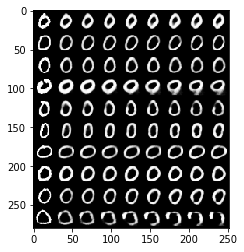

In [24]:
plt.imshow(fig,origin="upper",cmap="gray")
plt.savefig("13.png")

In [25]:
test_x, test_s = mnist.test.images, mnist.test.labels
x_sample = test_x[0:100,:]
x_sample.shape
fig = x_sample[0:10:,].reshape(280,28)

In [26]:
for i in range(8):
    x_sample = vae.reconstruct(x_sample)
    t = x_sample[0:10:,].reshape(280,28)
    fig = np.hstack((fig,t))

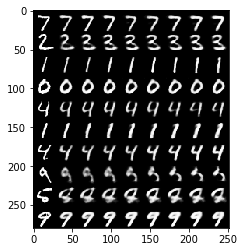

In [27]:
plt.imshow(fig,origin="upper",cmap="gray")
plt.savefig("14.png")

In [42]:
test_x, test_s = mnist.test.images, mnist.test.labels
which = lambda lst:list(np.where(lst)[0])
index=[]
for i in range(10):
    a = which(test_s[:,i]==1)[0]
    index.append(a)

index.extend(range(90))
x_sample = test_x[index,:]
x_sample.shape
fig = x_sample[0:10:,].reshape(280,28)

In [43]:
for i in range(8):
    x_sample = vae.reconstruct(x_sample)
    t = x_sample[0:10:,].reshape(280,28)
    fig = np.hstack((fig,t))

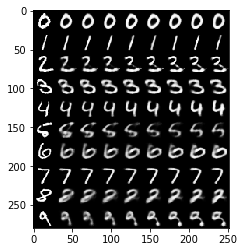

In [44]:
plt.imshow(fig,origin="upper",cmap="gray")
plt.savefig("14.png")